In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from datetime import date
from sklearn import metrics

In [546]:
features = [
    'Full Bath', 'house_age', 'Total Bsmt SF', 'Exter Qual',
    'total_SF', 'Garage Cars',
    'Bsmt Qual', 'Fireplace Qu', 'Sale Type_New',
    'Fireplaces', 'Gr Liv Area', 'curb_appeal', 'Bsmt Qual',
    'Year Remod/Add', 'Bedroom AbvGr', 'Year Built','overalls','Garage Yr Blt'
]
ames = pd.read_csv('./frames/training.csv')
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']

poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_overfit,y,
                                                   random_state=13,
                                                   test_size=.2)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

ridge_model = Ridge(alpha=10)
# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(cross_val_score(ridge_model, Z_train, y_train).mean())
print(ridge_model.score(Z_test, y_test))
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,ridge_model.predict(Z_test),squared=False)}')

'''
model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')
x = sm.add_constant(Z_train)
ols = sm.OLS(y_train,x).fit()
print(X.columns)
ols.summary()
'''

0.8768890833633882
0.8554391409711399
Root Mean Squared Error on training data: 29920.909261467652


"\nmodel = LinearRegression()\nmodel.fit(Z_train, y_train)\nprint(cross_val_score(model, Z_train, y_train,cv=5).mean())\nprint(model.score(Z_test,y_test)) \nprint(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')\nx = sm.add_constant(Z_train)\nols = sm.OLS(y_train,x).fit()\nprint(X.columns)\nols.summary()\n"

In [129]:
features = [
    'Overall Qual', 'house_age', 'total_SF', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
    'Bsmt Qual', 'Year Remod/Add', 'Full Bath', 'Exter Qual', 'overalls', 'Fireplaces', 
    'PID', 'Roof Style_Gable', 'curb_appeal', 'Lot Shape_Reg', 'Garage Finish_Unf',
    'Neighborhood_OldTown', 'Garage Finish_NA', 'Foundation_CBlock', 'Lot Shape_Reg', 'Ms SubClass_PUD',
]

test_frame = (pd.read_csv('./frames/testing.csv'))

X = test_frame[features]
X_overfit = poly.fit_transform(X)
sc = StandardScaler()
Z_test = sc.fit_transform(X_overfit)

test_frame['SalePrice'] = ridge_model.predict(Z_test)
sub = test_frame[['Id','SalePrice']]
sub.to_csv('./subs/mon519pm.csv',index=False)

In [516]:
ames = pd.read_csv('./frames/training.csv')
ames.corr()['SalePrice'].sort_values(ascending=True).head(20)

house_age              -0.571881
pens                   -0.555819
Garage Finish_Unf      -0.432220
Mas Vnr Type_None      -0.424088
Garage Type_Detchd     -0.370344
Foundation_CBlock      -0.355535
Heating QC_TA          -0.343542
Lot Shape_Reg          -0.306291
Bsmt Exposure_No       -0.293106
MS Zoning_RM           -0.281951
PID                    -0.255052
Roof Style_Gable       -0.249329
Garage Type_NA         -0.230990
Garage Finish_NA       -0.230855
Sale Type_WD           -0.212542
Neighborhood_OldTown   -0.208371
Exterior 1st_Wd Sdng   -0.191734
Neighborhood_NAmes     -0.189387
Neighborhood_IDOTRR    -0.189237
Neighborhood_Edwards   -0.176119
Name: SalePrice, dtype: float64

In [518]:
# OUR EXPLAINABLE MODEL
features = [
    'Overall Qual', 'Total Bsmt SF',
    'Kitchen Qual', '1st Flr SF', 'Exter Qual', 
    'curb_appeal', 'Garage Yr Blt', 'overalls',
    'Garage Area', 'TotRms AbvGrd', 
]
# read in the dataframe we already saved from data cleaning
ames = pd.read_csv('./frames/training.csv')
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=13,
                                                   test_size=.2)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')

x = sm.add_constant(Z_train)
ols = sm.OLS(y_train,x).fit()
print(X.columns)
ols.summary()

0.8078956855848196
0.7482407434608174
Root Mean Squared Error on training data: 39485.909941570135
Index(['Overall Qual', 'Total Bsmt SF', 'Kitchen Qual', '1st Flr SF',
       'Exter Qual', 'curb_appeal', 'Garage Yr Blt', 'overalls', 'Garage Area',
       'TotRms AbvGrd'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     712.3
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:17:58   Log-Likelihood:                -19451.
No. Observations:                1640   AIC:                         3.892e+04
Df Residuals:                    1629   BIC:                         3.898e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.812e+05    848.420    213.515      0.000    1.79e+05    1.83e+05
x1          1.576e+04   1950.920      8.076      0.000    1.19e+04    1.96e+04
x2          7869.0024   1504.899      5.229      0.000    4917.261    1.08e+04
x3          1.017e+04   1330.246      7.646      0.000    7562.339    1.28e+04
x4          8561.4169   1489.097      5.749      0.000    5640.671    1.15e+04
x5          1.092e+04   1466.062      7.447      0.000    8041.626    1.38e+04
x6          1.299e+04   1352.363      9.604      0.000    1.03e+04    1.56e+04
x7         -7749.1764   1135.363     -6.825      0.000   -9976.101   -5522.252
x8          5844.1752   1310.659      4.459      0.000    3273.420    8414.931
x9           1.61e+04   1343.324     11.986      0.000    1.35e+04    1.87e+04
x10         1.076e+04   1017.359     10.577      0.000    8765.436    1.28e+04
==============================================================================
Omnibus:                      371.265   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15468.502
Skew:                           0.124   Prob(JB):                         0.00
Kurtosis:                      18.043   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
ames.corr()['SalePrice'].sort_values(ascending=False).head(20)

SalePrice           1.000000
Overall Qual        0.800207
Exter Qual          0.712146
total_SF            0.705270
Gr Liv Area         0.697038
Kitchen Qual        0.692336
curb_appeal         0.676226
Garage Area         0.649897
Garage Cars         0.647781
Total Bsmt SF       0.629303
1st Flr SF          0.618486
Bsmt Qual           0.612188
Year Built          0.571849
overalls            0.565244
Year Remod/Add      0.550370
Fireplace Qu        0.538925
Full Bath           0.537969
Foundation_PConc    0.529047
TotRms AbvGrd       0.504014
Fireplaces          0.471093
Name: SalePrice, dtype: float64

In [473]:
features = [
    'Overall Qual', 'Total Bsmt SF',
    'Kitchen Qual', '1st Flr SF', 'Exter Qual', 
    'curb_appeal', 'Garage Yr Blt', 'overalls',
    'Garage Area', 'TotRms AbvGrd'
]

# read in the dataframe we already saved from data cleaning
ames = pd.read_csv('./frames/training.csv')
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']

poly = PolynomialFeatures(degree=1, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_overfit,y,
                                                   random_state=13,
                                                   test_size=.2)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

'''
model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')
'''

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(Z_train, y_train)
print(ridge_cv.alpha)

10


In [202]:
# Evaluate model using ridge.
ridge_model = Ridge(alpha=1)
# Fit.
ridge_model.fit(Z_train, y_train)
print(cross_val_score(ridge_model, Z_train, y_train).mean())
print(ridge_model.score(Z_test, y_test))
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,ridge_model.predict(Z_test),squared=False)}')

0.8309598053202121
0.7770670927155572
Root Mean Squared Error on training data: 37156.647023667065


In [203]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

/Users/evanhoefling/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843845861.890625, tolerance: 815258543.7468189
  model = cd_fast.enet_coordinate_descent_gram(


In [650]:
df = pd.read_csv('./data/train.csv')
df.groupby('Neighborhood')['SalePrice'].mean().sort_values()

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

<BarContainer object of 2 artists>

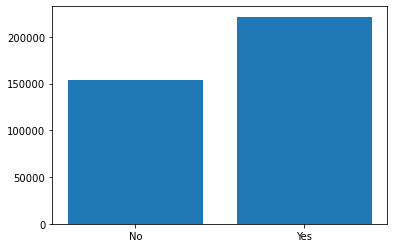

In [703]:
ames = pd.read_csv('./frames/training.csv')
df = pd.read_csv('./data/train.csv')
df['has_vnr_area'] = df['Mas Vnr Area'].apply(lambda x: 'Yes' if x != 0 else 'No')
x = df.groupby('has_vnr_area')['SalePrice'].mean()
plt.bar(x.keys(), x.values)

In [5]:
ames.corr()['SalePrice'].sort_values(ascending=False).head(20)

SalePrice           1.000000
Overall Qual        0.800207
Exter Qual          0.712146
curb_appeal         0.707847
total_SF            0.705270
Gr Liv Area         0.697038
Kitchen Qual        0.692336
Garage Area         0.649897
Garage Cars         0.647781
Total Bsmt SF       0.629303
1st Flr SF          0.618486
Bsmt Qual           0.612188
Year Built          0.571849
overalls            0.565244
Year Remod/Add      0.550370
Fireplace Qu        0.538925
Full Bath           0.537969
Foundation_PConc    0.529047
TotRms AbvGrd       0.504014
Mas Vnr Area        0.503579
Name: SalePrice, dtype: float64

In [3]:
# pluggin into ridge
ames = pd.read_csv('./frames/training.csv')
features = [
    'Overall Qual', 'Total Bsmt SF', 'Exter Qual',
    'Kitchen Qual', '1st Flr SF', 'Exter Qual', 
    'curb_appeal', 'Garage Yr Blt', 'overalls',
    'Garage Area', 'TotRms AbvGrd', 'Lot Frontage',
    'Bsmt Full Bath', 'Overall Qual', 'curb_appeal',
    'Fireplaces', 'total_SF', 'Gr Liv Area',
    'Year Remod/Add', 'PID', 'Roof Style_Gable',
    'Neighborhood_Edwards', 'MS Zoning_RM', 'Bsmt Exposure_No', 
    'Full Bath','Fireplace Qu', 'Year Built', 
]

X = ames[features]
y = ames['SalePrice']

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_overfit,y,
                                                   random_state=13,
                                                   test_size=.2)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

# Evaluate model using ridge.
ridge_model = Ridge(alpha=100)
# Fit.
ridge_model.fit(Z_train, y_train)
print(cross_val_score(ridge_model, Z_train, y_train, n_jobs=-1).mean())
print(ridge_model.score(Z_test, y_test))
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_train,ridge_model.predict(Z_train),squared=False)}')
print(f'Root Mean Squared Error on testing data: {metrics.mean_squared_error(y_test,ridge_model.predict(Z_test),squared=False)}')

0.8932913437176724
0.9017175450754624
Root Mean Squared Error on training data: 17720.52477722591
Root Mean Squared Error on testing data: 24671.03815153063


In [698]:
# results: 
features = [
    'Overall Qual', 'Total Bsmt SF', 'Exter Qual',
    'Kitchen Qual', '1st Flr SF', 'Exter Qual', 
    'curb_appeal', 'Garage Yr Blt', 'overalls',
    'Garage Area', 'TotRms AbvGrd', 'Lot Frontage',
    'Bsmt Full Bath', 'Overall Qual', 'curb_appeal',
    'Fireplaces', 'total_SF', 'Gr Liv Area',
    'Year Remod/Add', 'PID', 'Roof Style_Gable',
    'Neighborhood_Edwards', 'MS Zoning_RM', 'Bsmt Exposure_No', 
    'Full Bath','Fireplace Qu', 'Year Built'
]

test_frame = pd.read_csv('./frames/testing.csv')

X = test_frame[features]
X_overfit = poly.fit_transform(X)
sc = StandardScaler()
Z_test = sc.fit_transform(X_overfit)

test_frame['SalePrice'] = ridge_model.predict(Z_test)
sub = test_frame[['Id','SalePrice']]
sub.to_csv('./subs/ridged20.csv',index=False)